In [1]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [44]:
import matplotlib.colors as colors

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 10

In [3]:
import pandas as pd

import numpy as np

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

**The data**

In [185]:
df = pd.read_csv("../data/counting_two_bit/bits_4_beta_1_seed_1_c_0.5.csv")

In [186]:
df = df.drop_duplicates()

In [187]:
names2 = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]

In [188]:
df.columns = names2

In [189]:
(df['p_2'] == df['p_3']).all()

True

In [190]:
def frequencies(df, max_steps=10 ** 7):

    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

In [222]:
df = frequencies(df)

In [223]:
high = df[df['frequencies'] > 10 ** 3 + 10]

In [224]:
X = high[['p_4', 'p_2', 'p_1']].values

In [225]:
x = np.arange(0, 1, 0.03)

y1 = np.arange(0, 1, 0.03)

y2 = np.arange(0, 1, 0.03)

xx1, yy1 = np.meshgrid(x, y1)

z = 1 - (.5 / 1) + xx1 * 0 + yy1 * 0

z2 = 1 - (.5 / 2 * 1)

In [226]:
r0 = 1 - (.5 / 1)

r1 = 1 - (.5 / 2 * 1)

In [227]:
v = np.array([[0, 0, 1],
              [0, r1, 1],
              [r0, r1, 1],
              [r0, 0, 1]])

verts = [[v[0], v[1], v[2], v[3], v[0]]]

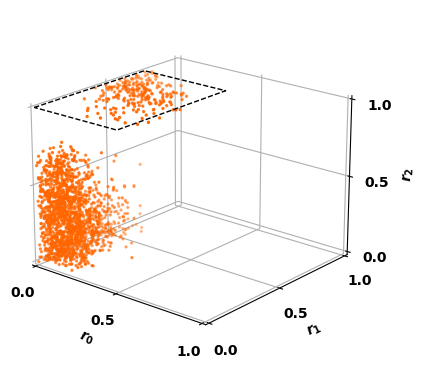

In [287]:
%matplotlib inline

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121, projection='3d', computed_zorder=False)

axes = [ax1]

ax1.scatter(X[:,0], X[:,1], X[:,2], color=col(0.4), s=2, zorder=-2)

ax1.add_collection3d(Poly3DCollection(verts, facecolors="tab:green", alpha=.0,
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='black',
                                     zorder=0))

ax1.view_init(20, -50)

ax1.set_xlim(0, 1);
ax1.set_ylim(0, 1);
ax1.set_zlim(0, 1);


# ax1.annotate("partners strategies", (0.01, 0.015), fontsize=8, rotation=-15, color="black", zorder=1);


ax1.set_xticks(np.linspace(0, 1, 3));
ax1.set_zticks(np.linspace(0, 1, 3));
ax1.set_yticks(np.linspace(0, 1, 3));

ax1.set_xlabel("$r_0$", fontsize=10)
ax1.set_ylabel("$r_1$", fontsize=10)

ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.set_zlabel("$r_2$", fontsize=10);


fig.savefig("../figures/counting_strategies_evolution.pdf", bbox_inches='tight')

In [99]:
def frequencies(df, max_steps=10 ** 7):

    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

In [86]:
import glob 

In [96]:
files = glob.glob("../data/counting_two_bit/*.csv")

In [97]:
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [98]:
names = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]

In [165]:
dfs = []

for file in files:
    beta = float(file.split("beta_")[1].split("_")[0])
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    df = pd.read_csv(file, names=names)
        
    df = df.drop_duplicates()

    df['beta'] = beta
    
    df['c'] = c
    
    
    df = frequencies(df, 10 ** 7)

    dfs.append(df)

In [166]:
df = pd.concat(dfs)

In [167]:
groups = df.groupby("beta")

In [168]:
per_beta_points = []
for i, group in groups:
    points = []
    group = group.sort_values("c")
    cost_groups = group.groupby("c")
    
    for j, cost_group in cost_groups:
        points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
        
    per_beta_points.append(points)

In [169]:
col = plt.cm.autumn

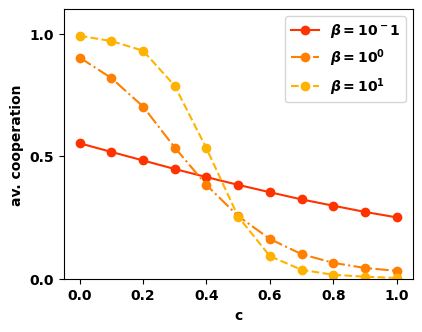

In [217]:
fig, ax = plt.subplots(figsize=(4.5, 3.5));

for i, points, style, beta in zip([.2, .5, .7],
                            per_beta_points,
                            ["-o", "-.o", "--o"],
                            ["10^-1", "10^0", "10^1"]):
    
    ax.plot(np.linspace(0, 1, 11), points, style, color=col(i), label=fr"$\beta={beta}$")
    
ax.set_ylim(0, 1.1)

ax.set_yticks([0, .5, 1])

ax.set_xlabel("c")

ax.set_ylabel("av. cooperation");

plt.legend();

fig.savefig("../figures/counting_strategies_evolution_betas.pdf", bbox_inches='tight')

/var/folders/v3/y0vlrrxn4cv908b7l8wpf76r0000gn/T/ipykernel_15308/905475812.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, "", "", "", "", 1])
/var/folders/v3/y0vlrrxn4cv908b7l8wpf76r0000gn/T/ipykernel_15308/905475812.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, "", "", "", "", 1])
/var/folders/v3/y0vlrrxn4cv908b7l8wpf76r0000gn/T/ipykernel_15308/905475812.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels([0, "", "", "", "", 1]);


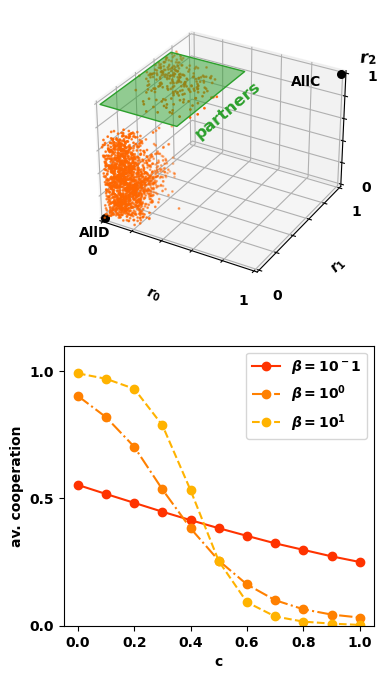

In [210]:
fig = plt.figure(figsize=plt.figaspect(2.))

# Second subplot
ax = fig.add_subplot(2, 1, 1, projection='3d')

ax.scatter(0, 0, 0, color='black',zorder=1, s=30);

ax.scatter(1, 1, 1, color='black',zorder=1, s=30);

ax.scatter(X[:,0], X[:,1], X[:,2], color=col(0.4), s=1, zorder=-2)

# ax1.plot_surface(z, xx1, yy1, alpha=0.5, color='crimson');

ax.add_collection3d(Poly3DCollection(verts, facecolors="tab:green", alpha=.5,
                                     linewidths=1,
                                     linestyle='-',
                                     edgecolors='tab:green',
                                     zorder=0))

# ax1.plot_surface(xx1, z2, yy1, alpha=0.2, color='crimson');

# ax1.view_init(25, -60)

ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.set_zlim(0, 1);

ax.set_xlabel("$r_0$", fontsize=10)
ax.set_ylabel("$r_1$", fontsize=10)
# ax1.set_zlabel("$r_2$", fontsize=10);

ax.annotate("AllD", (-0.095, -0.06), fontsize=10);

ax.annotate("AllC", (0.045, 0.04), fontsize=10);

ax.annotate("$r_2$", (0.09, 0.055), fontsize=12, rotation=5);

ax.annotate("partners", (-0.02, 0.005), fontsize=12, rotation=40, color="tab:green", zorder=1);


ax.set_xticklabels([0, "", "", "", "", 1])
ax.set_yticklabels([0, "", "", "", "", 1])
ax.set_zticklabels([0, "", "", "", "", 1]);



ax = fig.add_subplot(2, 1, 2)

for i, points, style, beta in zip([.2, .5, .7],
                            per_beta_points,
                            ["-o", "-.o", "--o"],
                            ["10^-1", "10^0", "10^1"]):
    
    ax.plot(np.linspace(0, 1, 11), points, style, color=col(i), label=fr"$\beta={beta}$")
    
ax.set_ylim(0, 1.1)

ax.set_yticks([0, .5, 1])

ax.set_xlabel("c")

ax.set_ylabel("av. cooperation");

ax.legend();


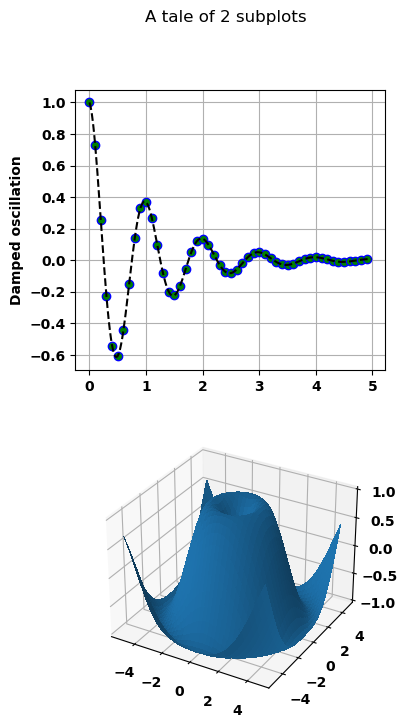

In [178]:
def f(t):
    return np.cos(2*np.pi*t) * np.exp(-t)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('A tale of 2 subplots')

# First subplot
ax = fig.add_subplot(2, 1, 1)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

ax.plot(t1, f(t1), 'bo',
        t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()